# TRAIN

In [1]:
import pandas as pd
import numpy as np

fetaldf = pd.read_csv('fetalcelltype2.csv',index_col=0)
display(fetaldf.head())
print(fetaldf.shape)

,leiden,celltype
AAACCTGCAAGCCTAT-1,13,3 mye 2 TAM
AAACCTGCACAGAGGT-1,15,2 lymph 1 NK2
AAACCTGCATGCCTTC-1,3,3 mye 2 TAM
AAACCTGGTAAGTGTA-1,6,Unknown
AAACCTGGTCAATGTC-1,8,Unknown


(60854, 2)


In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

cmap = matplotlib.cm.ocean.reversed()

def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

fig = plt.figure()
ax = fig.add_subplot(311)
### Create a list of RGB tuples
colors = [(239, 248, 249), (252, 78, 78),(96, 33, 104),(0,0,0)]  # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
### Use your colormap
plt.pcolor(np.random.rand(25,50), cmap=my_cmap)
plt.colorbar()

def sns_heatmap(df,title,subtitle):
    mat = pd.DataFrame()

    for i in range(df.shape[1]):
        if i==df.shape[1]-1:
            break
        for j in range(df.shape[0]):
            a = []
            for k in range(df.shape[0]):
                if j == k:
                    a.append(df.iloc[j,i]*df.iloc[k,i+1])
                else :
                    a.append(0)
            mat[j]=a

    mat.columns = df.index
    mat.index = df.index

    mat = mat.rename_axis(df.columns[1])
    mat = mat.rename_axis(df.columns[0], axis="columns")

    f, ax = plt.subplots()
    sns.heatmap(mat,vmax=1500, vmin=-1, cmap=my_cmap)#
    plt.title(title, fontsize=20)
    plt.suptitle(subtitle, fontsize=12)

    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)



In [3]:
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Previous size: [6.0, 4.0]
Current size: [12, 12]


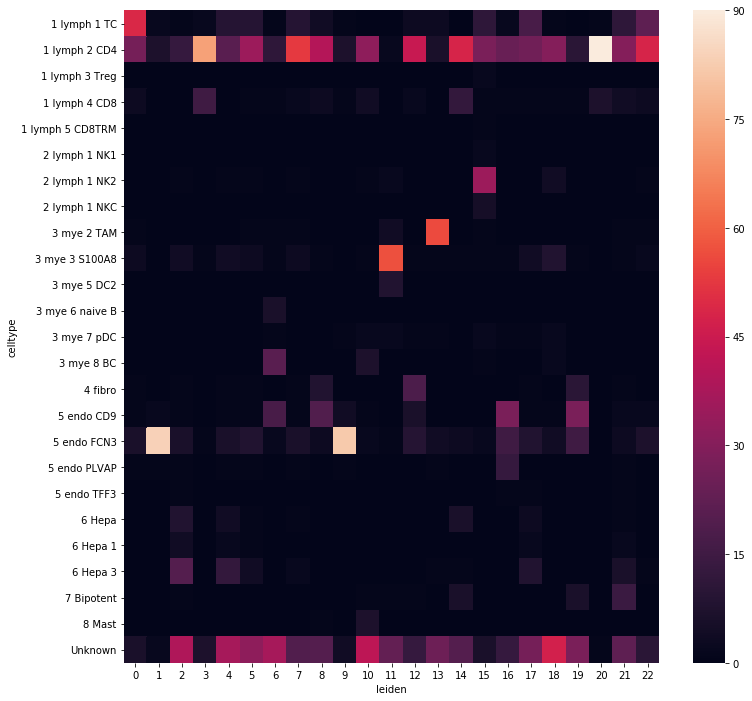

In [4]:
fetaldf1 = fetaldf.groupby(['leiden','celltype']).size().unstack().fillna(0).round(0).astype(int).transpose()

#fetaldf1 = fetaldf1.drop(['Unknown'], axis=0)

fetaldf1 = fetaldf1.apply(lambda x : x/sum(x)*100).round(0).astype(int)

sns.heatmap(fetaldf1)#, annot=True)#, vmax = 500, fmt="d", linewidths=.01)#, linewidths=.009)#cmap="YlGnBu", 
#plt.title('\nHCC cell type agnostic correlation\n', fontsize=20)

#  

#  TEST

In [21]:
myedf = pd.read_csv('./mye/test_cluster_ext_type.csv',index_col=0)
display(myedf.head())
print(myedf.shape)

,cluster_ext_type,CellType
AAGTCTGTCATCTGCC-1,DC2,DC2
ACTTTCACAGTCTTCC-1,DC2,pDC
ACTTTCAGTCCCTACT-1,TAM1,FLM
CAACTAGCACCCTATC-1,DC2,DC2
CCTTCCCTCGCCTGTT-1,Monocyte,Monocytes


(9307, 2)


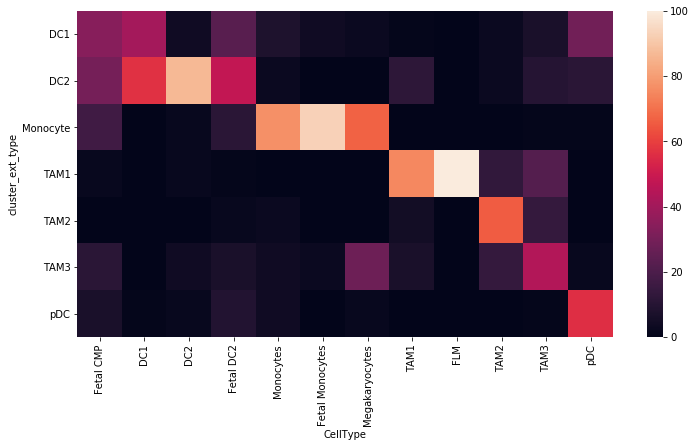

In [37]:
myedf1 = myedf.groupby(['cluster_ext_type','CellType']).size().unstack().fillna(0).round(0).astype(int)

myedf1 = myedf1.drop(['Unknown'], axis=0)
#myedf1 = myedf1.drop(['Fetal CMP'], axis=0)

myedf1 = myedf1[['Fetal CMP','DC1','DC2','Fetal DC2','Monocytes','Fetal Monocytes','Megakaryocytes','TAM1','FLM','TAM2','TAM3','pDC']]

myedf1 = myedf1.apply(lambda x : x/sum(x)*100, axis=0).round(0).astype(int)

sns.heatmap(myedf1)#, annot=True)#, vmax = 500, fmt="d", linewidths=.01)#, linewidths=.009)#cmap="YlGnBu", 
#plt.title('\nHCC cell type agnostic correlation\n', fontsize=20)

In [33]:
myedf1

CellType,DC1,DC2,FLM,Fetal CMP,Fetal DC2,Fetal Monocytes,Megakaryocytes,Monocytes,TAM1,TAM2,TAM3,pDC
cluster_ext_type,,,,,,,,,,,,
DC1,41,4,0,34,23,4,3,8,1,3,7,29
DC2,57,87,0,30,48,0,0,3,12,3,10,11
Monocyte,0,2,0,17,11,93,67,77,0,0,1,1
TAM1,0,2,100,2,1,0,0,0,75,13,22,0
TAM2,0,0,0,0,2,0,0,3,5,66,14,0
TAM3,0,4,0,11,7,3,28,4,7,14,44,2
pDC,1,2,0,7,9,0,2,4,0,0,1,56


In [35]:
myedf1 = myedf1[['Fetal CMP','DC1','DC2','Fetal DC2','Monocytes','Fetal Monocytes','Megakaryocytes',
                 'TAM1','FLM','TAM2','TAM3','pDC']]

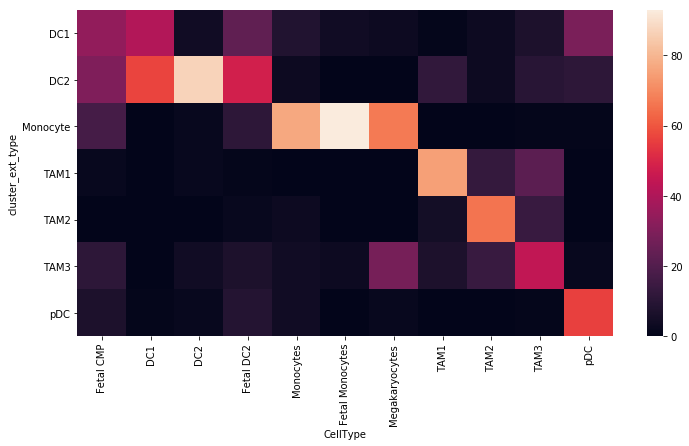

In [36]:
sns.heatmap(myedf1)